MAHNOOR SADIQ - Intern ID- CC58532
Designation- Data Science Intern
Batch- September 2023









Loading dataset from kaggle https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

In [19]:
# Load the dataset
df = pd.read_csv('/content/churn-bigml-20.csv')
print(df)

    State  Account length  Area code International plan Voice mail plan  \
0      LA             117        408                 No              No   
1      IN              65        415                 No              No   
2      NY             161        415                 No              No   
3      SC             111        415                 No              No   
4      HI              49        510                 No              No   
..    ...             ...        ...                ...             ...   
662    WI             114        415                 No             Yes   
663    AL             106        408                 No             Yes   
664    VT              60        415                 No              No   
665    WV             159        415                 No              No   
666    CT             184        510                Yes              No   

     Number vmail messages  Total day minutes  Total day calls  \
0                        0       

Install Seaborn for data visualization

In [20]:
!pip install seaborn


Code for importing necessary libraries

In [21]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Code for predicting churn

In [23]:


# Load the dataset
df = pd.read_csv('/content/churn-bigml-20.csv')

# Define feature columns and target variable
X = df.drop(['Churn'], axis=1)
y = df['Churn']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=['State', 'International plan', 'Voice mail plan', 'Area code'])

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Create and train a Logistic Regression Model
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.90
Confusion Matrix:
[[172   1]
 [ 20   8]]
Classification Report:
              precision    recall  f1-score   support

       False       0.90      0.99      0.94       173
        True       0.89      0.29      0.43        28

    accuracy                           0.90       201
   macro avg       0.89      0.64      0.69       201
weighted avg       0.89      0.90      0.87       201



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Numerical column plot

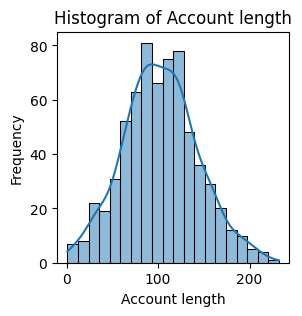

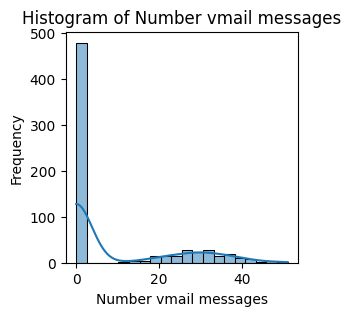

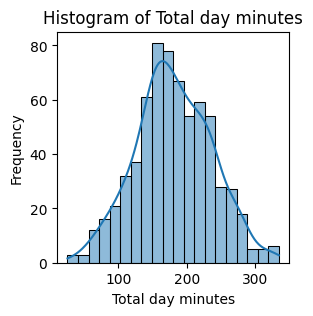

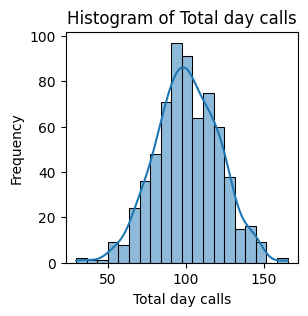

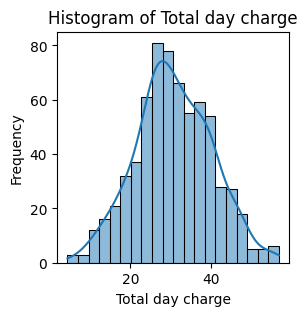

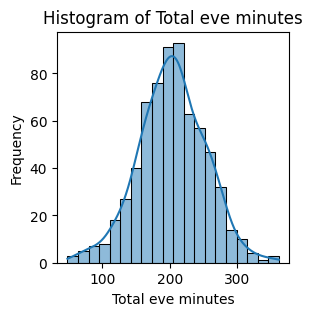

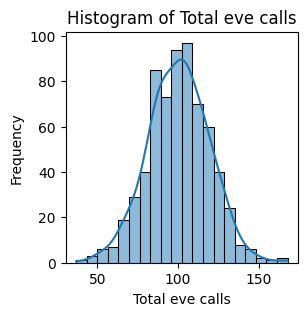

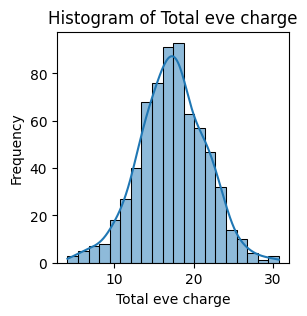

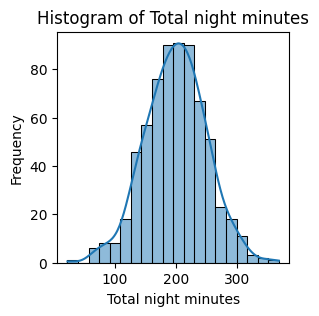

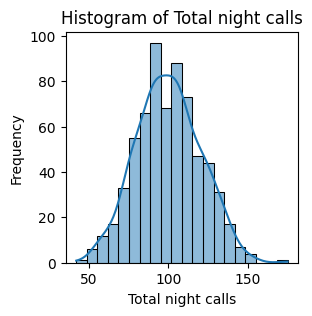

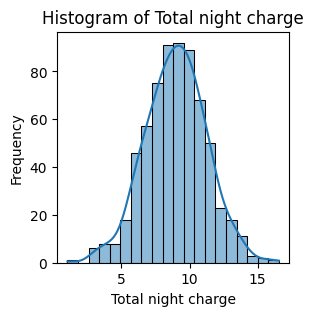

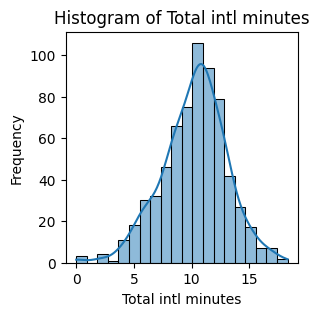

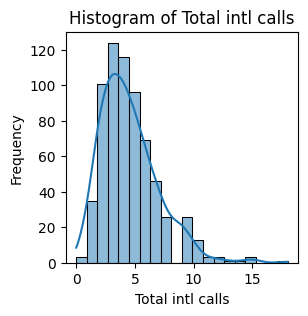

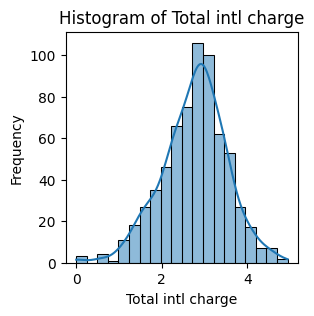

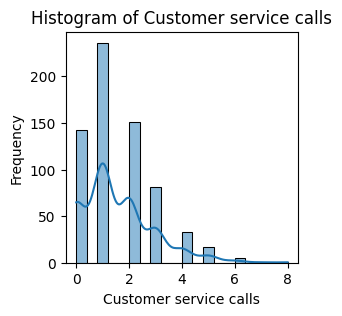

In [24]:
# Plot histograms for numerical columns
numerical_columns = X_encoded.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

Categorical column plot

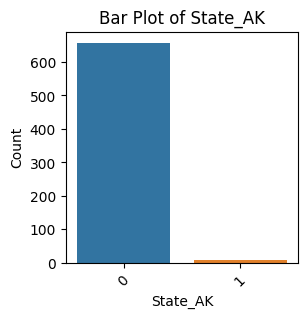

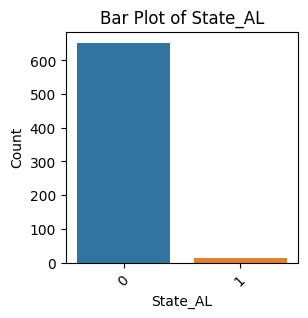

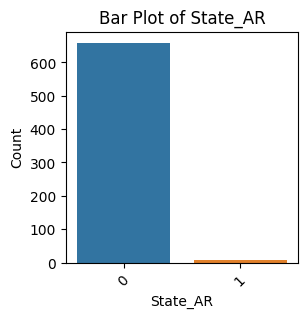

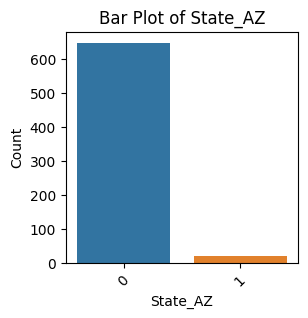

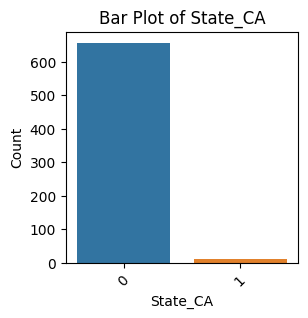

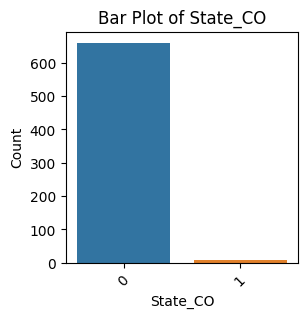

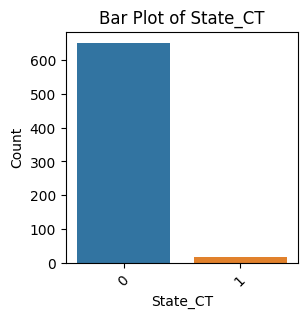

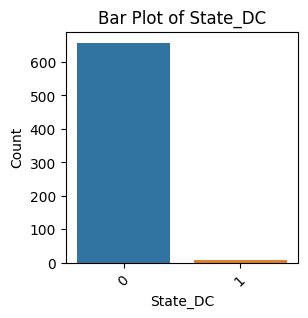

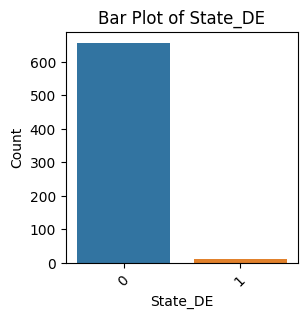

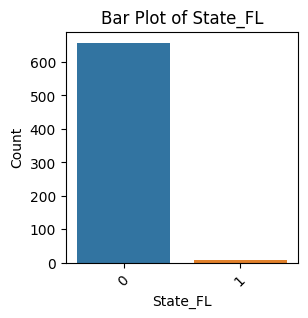

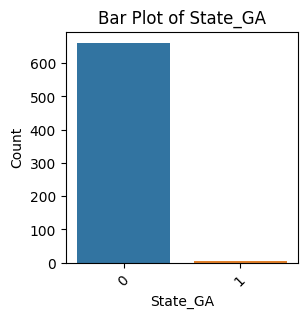

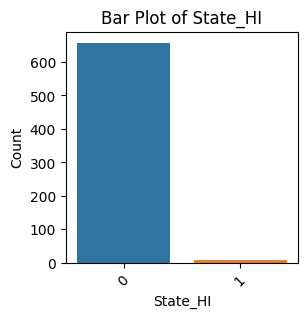

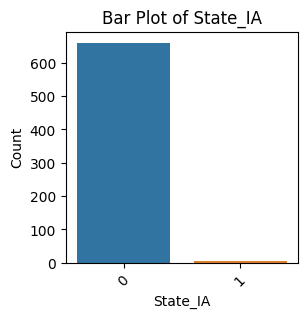

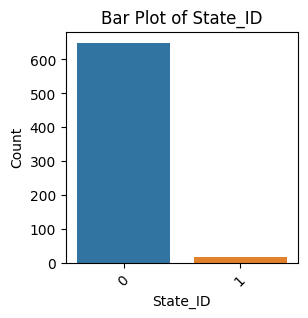

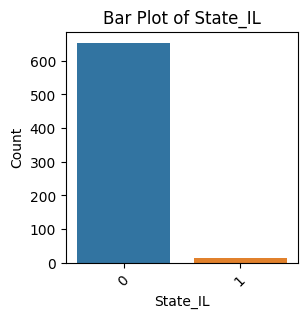

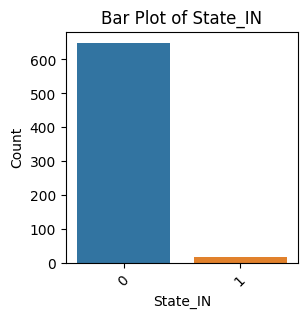

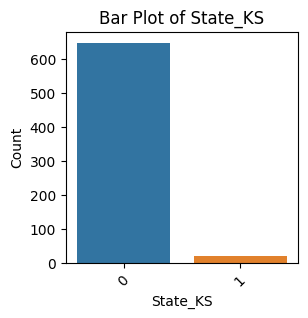

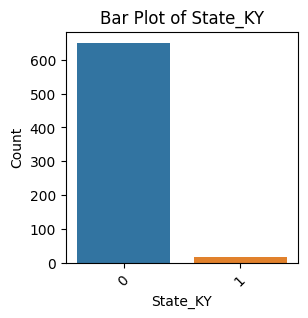

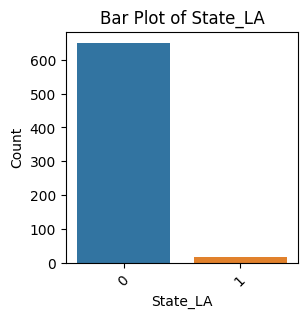

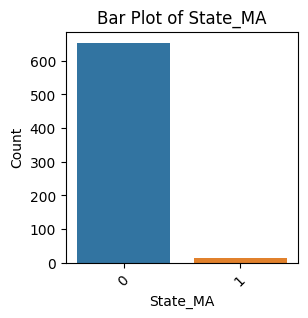

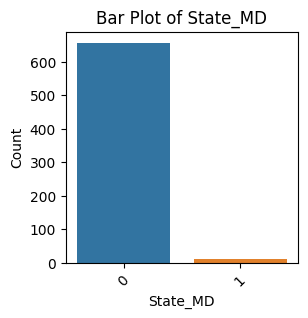

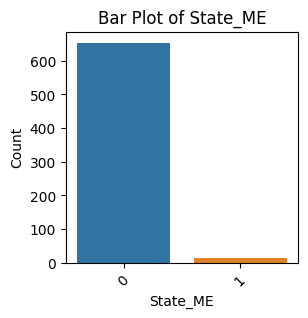

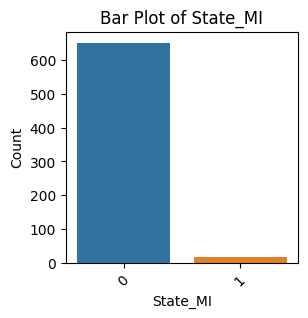

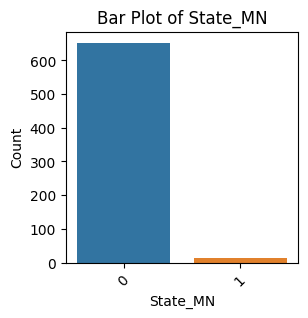

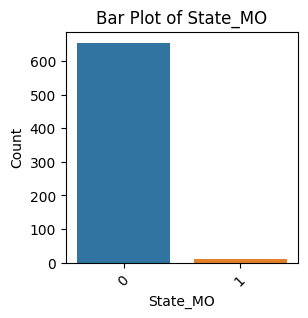

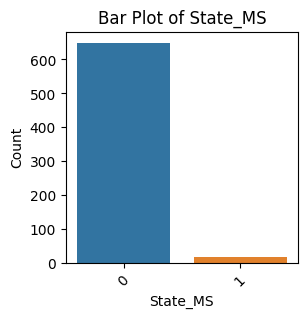

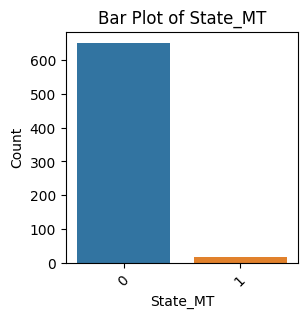

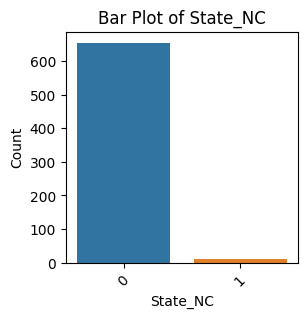

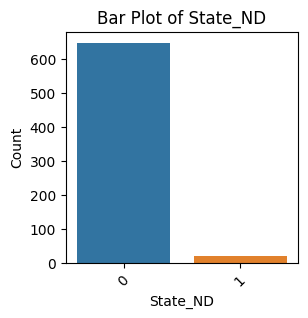

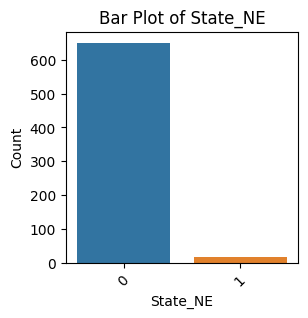

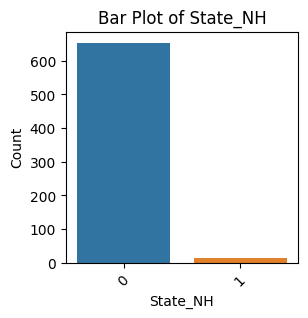

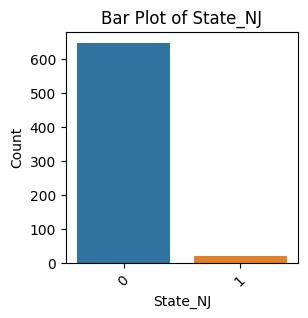

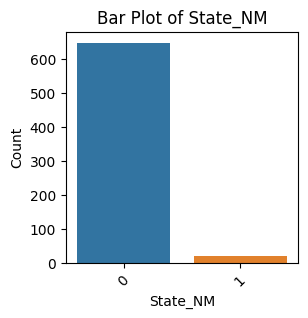

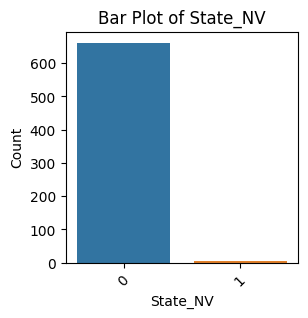

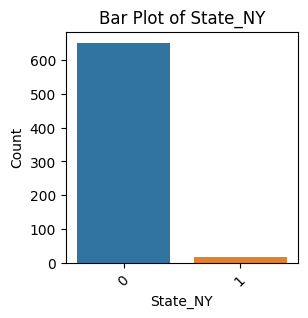

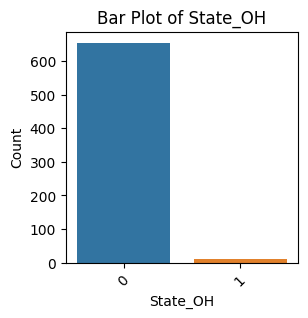

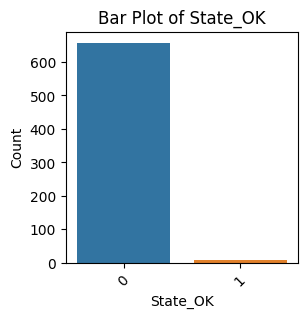

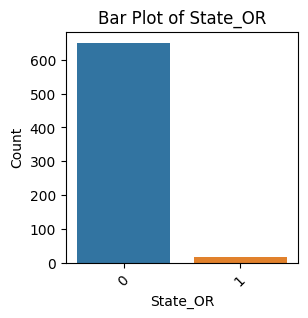

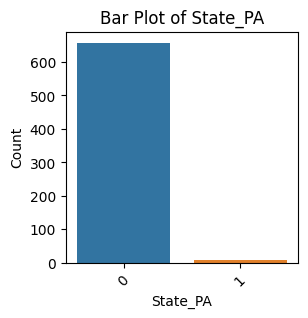

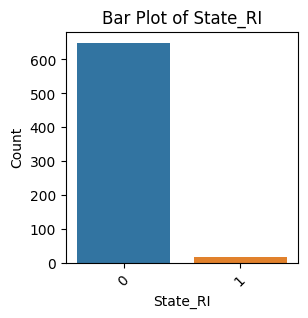

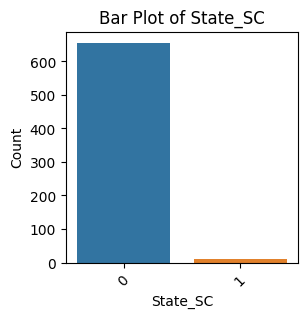

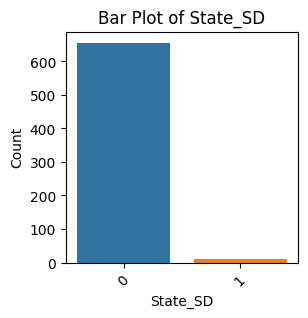

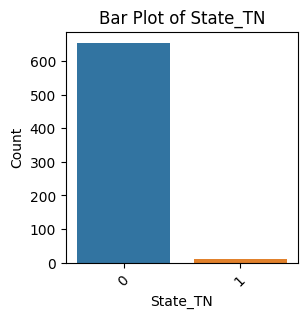

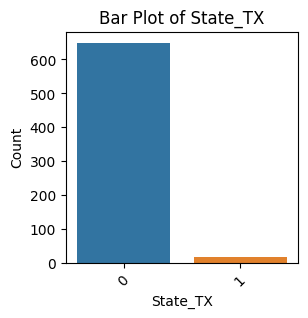

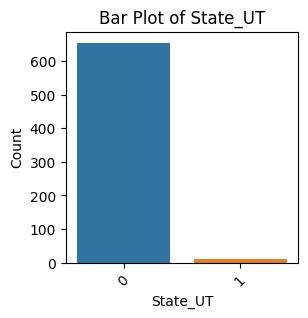

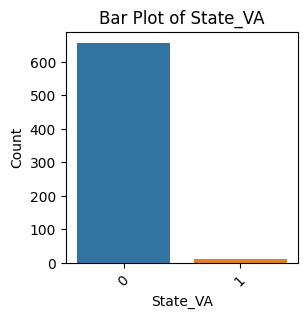

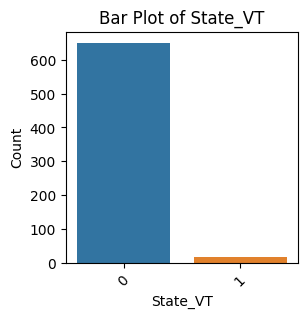

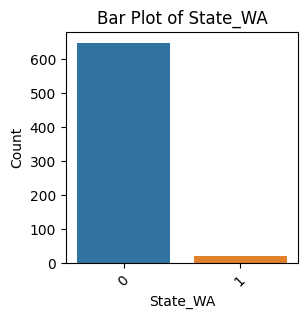

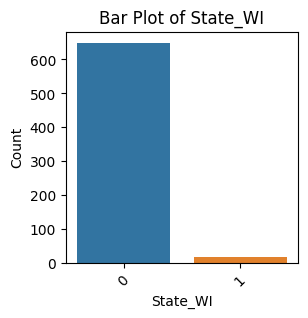

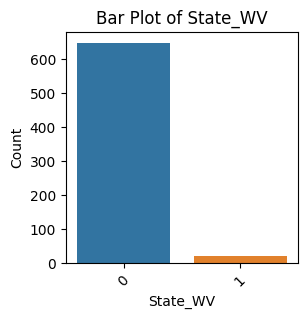

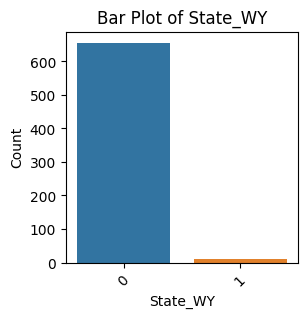

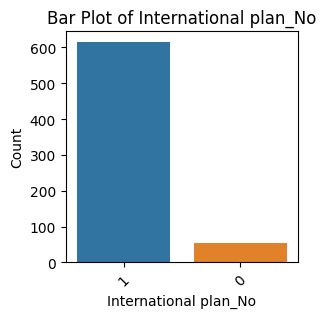

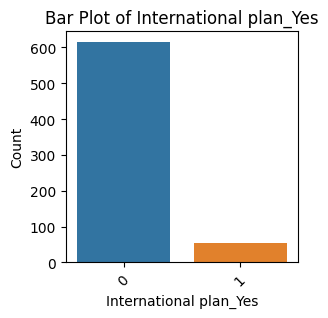

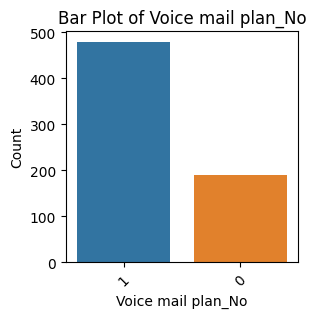

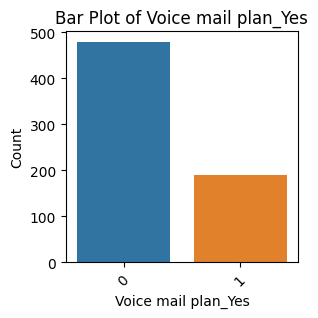

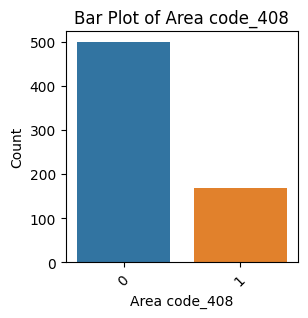

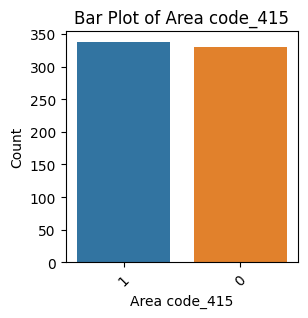

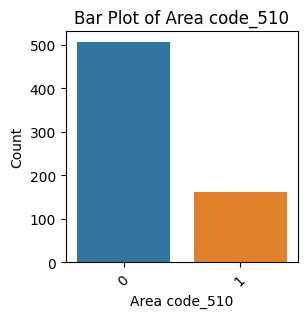

In [17]:
# Plot bar plots for categorical columns
categorical_columns = X_encoded.select_dtypes(include=['uint8']).columns
for col in categorical_columns:
    plt.figure(figsize=(3, 3))
    sns.countplot(data=X_encoded, x=col, order=X_encoded[col].value_counts().index)
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()